Kiểm tra và đảm bảo mô hình được train trên bộ xử lý thích hợp

In [ ]:
!nvidia-smi

Wed Jan 15 15:54:18 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Tải các tệp yolov9

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 4.66 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00


Tải thư viện Roboflow để lấy dataset và lưu trữ model


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00


Tải xuống các trọng số của mô hình yolov9

Trọng số pre-trained giúp mô hình bắt đầu huấn luyện với các giá trị đã được tối ưu hóa từ trước, giúp tăng tốc độ huấn luyện và cải thiện hiệu suất.

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Jan 18 19:51 .
drwxr-xr-x 1 root root      4096 Jan 18 19:51 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


Xác thực Roboflow và tải xuống dataset đã được chuẩn bị

Dataset sẽ được lưu trong `{HOME}/yolov9`

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("trafficsignyolov9").project("traffic-sign-detection-2lmuq-ysmmk")
version = project.version(2)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Sign-Detection-2 in yolov9:: 100%|██████████| 10562/10562 [00:04<00:00, 2192.11it/s]


In [ ]:
# Kiểm tra các phiên bản có sẵn trong project
project = rf.workspace("trafficsignyolov9").project("traffic-sign-detection-2lmuq-ysmmk")

# In danh sách các phiên bản
print("Available versions:")
for version in project.versions():
    print(f"Version: {version.version}, Created: {version.created}")


loading Roboflow workspace...
loading Roboflow project...
Available versions:
Version: 2, Created: 1736955265.899


## Train Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 15 --img 640 --device 0 --min-items 0 --close-mosaic 8 \
--data  /content/yolov9/Traffic-Sign-Detection-2/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2025-01-15 15:58:05.577769: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-15 15:58:05.594516: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-15 15:58:05.600357: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 15:58:05.614079: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-15 15:58:06.793683: W tensorf

## Phân tích kết quả huấn luyện

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    labels_correlogram.jpg  PR_curve.png  weights
events.out.tfevents.1736956700.461d34e94541.2240.0  labels.jpg		    R_curve.png
F1_curve.png					    opt.yaml		    results.csv
hyp.yaml					    P_curve.png		    results.png


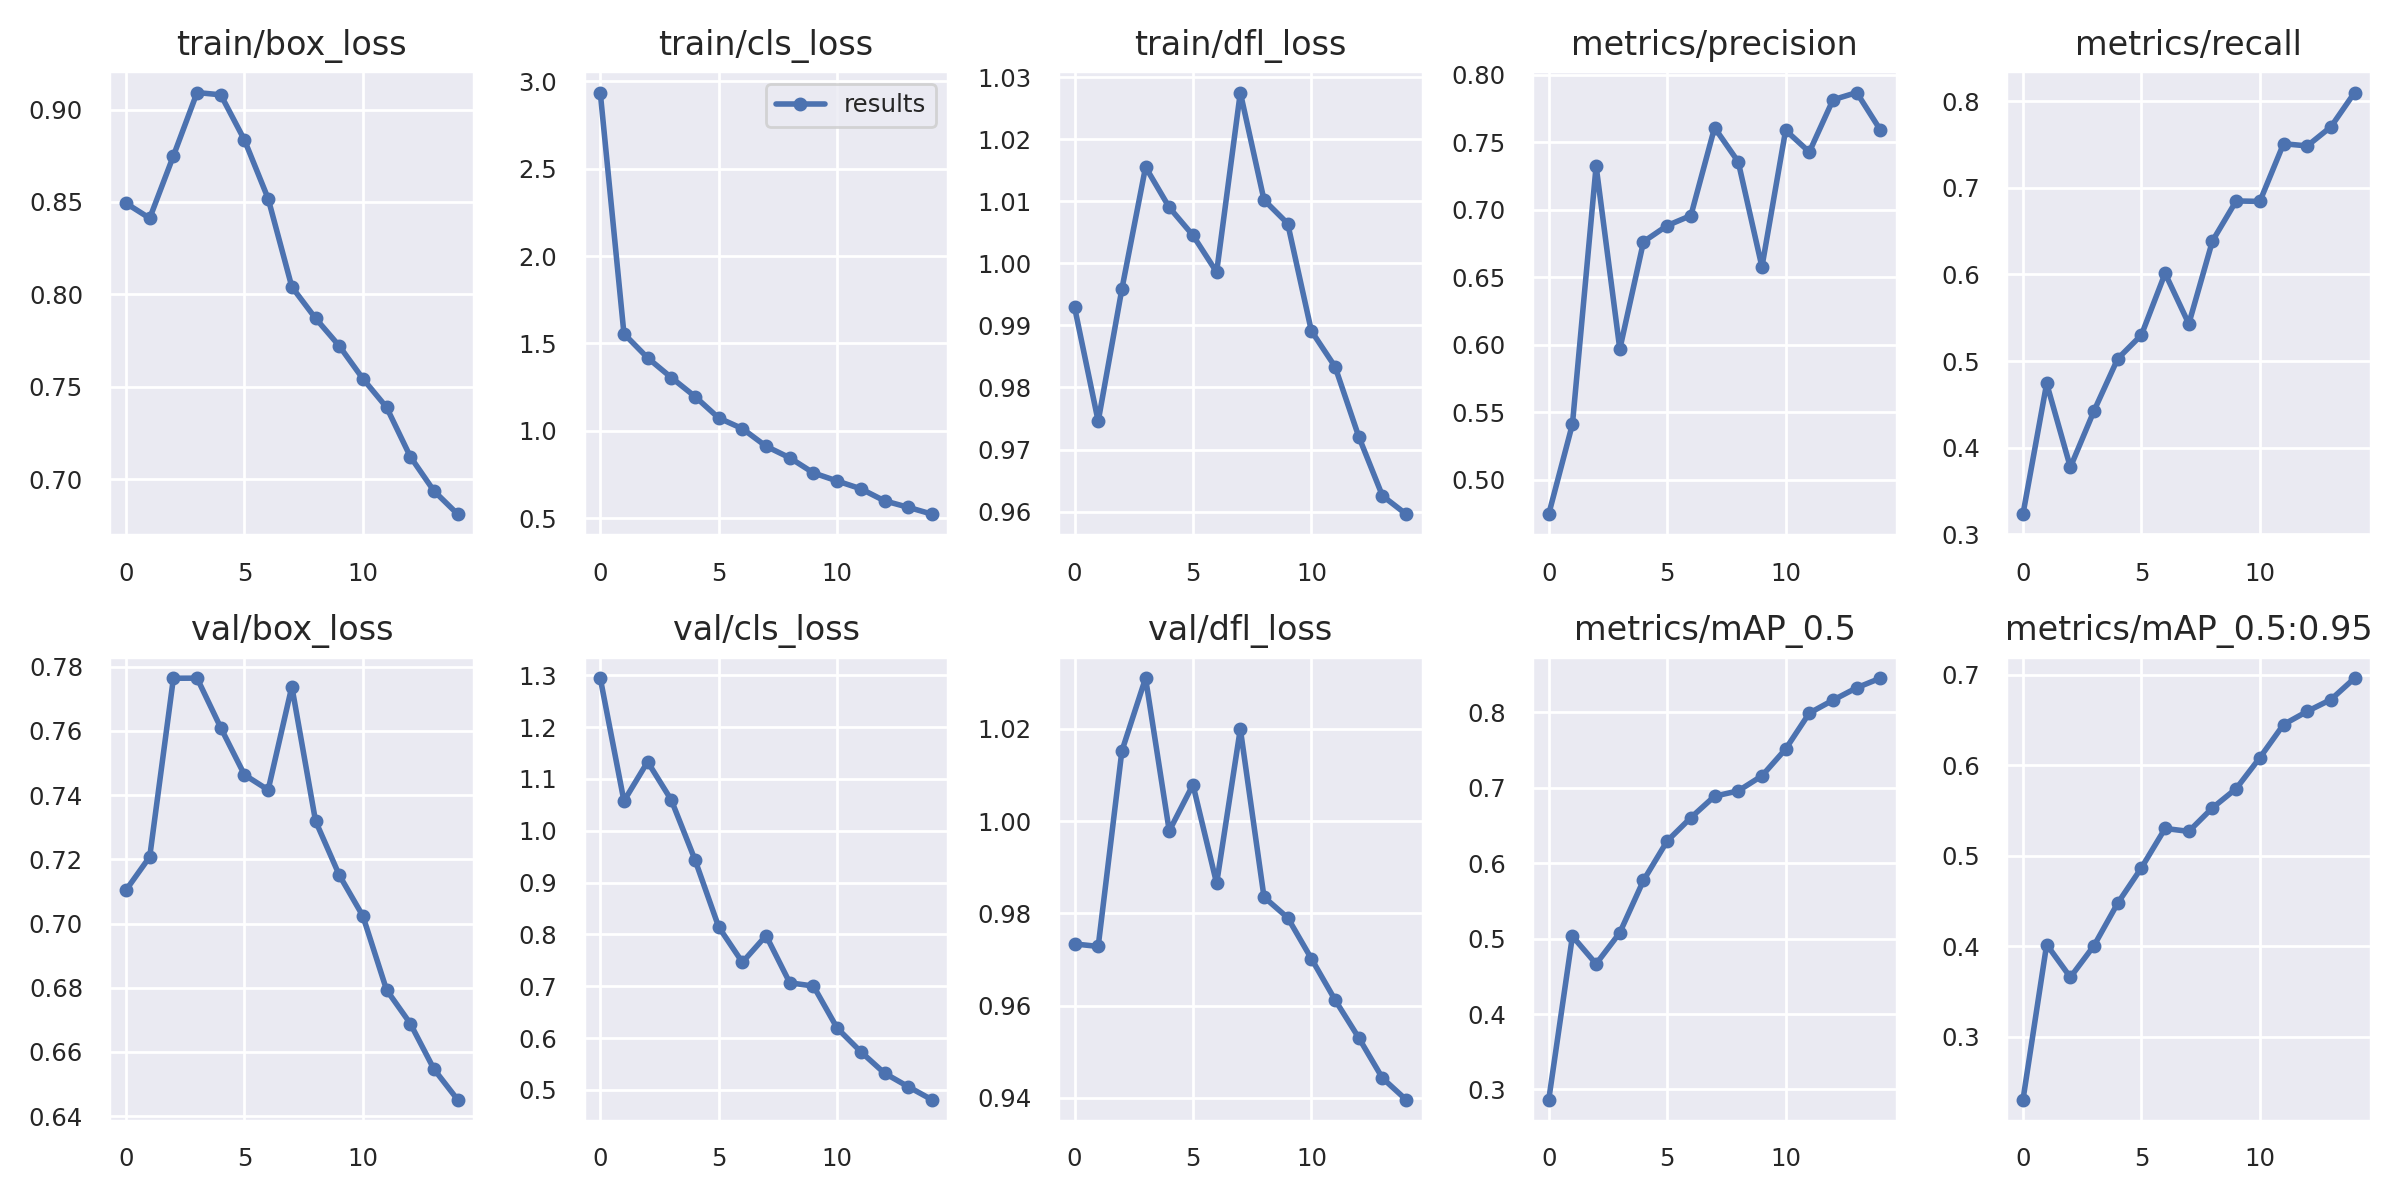

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

Deploy model lên Roboflow.

In [ ]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.0/944.0 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

Nhận diện trên video

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/trafficsignyolov9/traffic-sign-detection-2lmuq-ysmmk/2
Share your model with the world at: https://universe.roboflow.com/trafficsignyolov9/traffic-sign-detection-2lmuq-ysmmk/model/2


In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="traffic-sign-detection-2lmuq-ysmmk/2", api_key=ROBOFLOW_API_KEY)

··········


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="RrydU1jrKch3098YLCh5")
project = rf.workspace().project("traffic-sign-detection-2lmuq-ysmmk")
model = project.version("2").model

job_id, signed_url, expire_time = model.predict_video(
    "/content/test.mp4",
    fps=30,
    prediction_type="batch-video",
)

results = model.poll_until_video_results(job_id)

print(results)


loading Roboflow workspace...
loading Roboflow project...
Checking for video inference results for job 7a5570e3-01b5-40e3-8c58-185484bf5403 every 60s
(0s): Checking for inference results
(60s): Checking for inference results
(120s): Checking for inference results
(180s): Checking for inference results
(240s): Checking for inference results
(300s): Checking for inference results
(360s): Checking for inference results
(420s): Checking for inference results
{'frame_offset': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230

In [ ]:
results

{'frame_offset': [0,
  2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  78,
  80,
  82,
  84,
  86,
  88,
  90,
  92,
  94,
  96,
  98,
  100,
  102,
  104,
  106,
  108,
  110,
  112,
  114,
  116,
  118,
  120,
  122,
  124,
  126,
  128,
  130,
  132,
  134,
  136,
  138,
  140,
  142,
  144,
  146,
  148,
  150,
  152,
  154,
  156,
  158,
  160,
  162,
  164,
  166,
  168,
  170,
  172,
  174,
  176,
  178,
  180,
  182,
  184,
  186,
  188,
  190,
  192,
  194,
  196,
  198,
  200,
  202,
  204,
  206,
  208,
  210,
  212,
  214,
  216,
  218,
  220,
  222,
  224,
  226,
  228,
  230,
  232,
  234,
  236,
  238,
  240,
  242,
  244,
  246,
  248,
  250,
  252,
  254,
  256,
  258,
  260,
  262,
  264,
  266,
  268,
  270,
  272,
  274,
  276,
  278,
  280,
  282,
  284,
  286,
  288,
  290,
  292,
  294,
  2

{'inference_id': '1b3d3e21-6ecf-433d-a8c3-6a571e3a5fde',
   'time': 0.1942331690224819,
   'image': {'width': 1280, 'height': 720},
   'predictions': [{'x': 1068.5,
     'y': 337.0,
     'width': 149.0,
     'height': 148.0,
     'confidence': 0.5387670993804932,
     'class': 'R.301d',
     'class_id': 25,
     'detection_id': '1d533f80-db10-418a-b378-c4b9a31f78f0'}]},